In [72]:
# check for necessary 
from __future__ import division
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import (StandardScaler, MinMaxScaler)
from sklearn.cross_validation import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_curve, auc, log_loss, classification_report)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from operator import itemgetter
import pickle


import seaborn as sns
import plotly.plotly as py
from plotly.graph_objs import *
from scipy import stats
from scipy.stats import (median_test, mannwhitneyu)



from sklearn.feature_selection import chi2

from sklearn.learning_curve import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import (cross_val_score, cross_val_predict)

from sklearn import preprocessing
%matplotlib inline

from sklearn.externals.six import StringIO
import pydot

from sklearn import tree
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import datasets, svm
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import cross_validation


In [22]:
df = pd.read_pickle('../datafiles/data.p')

In [133]:
df['leadership', '']

SyntaxError: invalid syntax (<ipython-input-133-42675404d103>, line 1)

In [39]:
money = ['itemproxy','unitemproxy','ieproxy','totalind','instate',
         'itemind', 'unitemagainst', 'itemagainst' ,'unitemfor',
         'unitemind', 'totalpacs','itempacs','unitempacs',
         'ieagainst','itemfor', 'iefor' , 'unitemtotal',  
         'itemtotal' ,'total', 'unitemie',  'itemie','percunitem',
         'percpacs', 'ie', 'percie','percind','percstate']

coms =['ecn' ,'tax',  'bus', 'rul', 'sci', 'tra', 'nat' ,'jud',
       'adm' ,'gov' ,'for' ,'ene' ,'edu', 'bud', 'ban' ,'arm',
       'app', 'pri', 'egw', 'lib', 'hsc', 'int', 'way', 'vet', 
       'sta', 'agr']

bio = [ 'congyear' , 'feccandid', 'party', 'candname' , 'winner', 'cpo', 'office', 'state', 'district']
status = ['leader', 'chairman' ,'power', 'leadershipcom', 'leadership']
election = ['close2' , 'close5', 'close10', 'vap',  'generalturnout', 
            'primaryturnout' ,  'primary' , 'primaryperc' ,  'general','generalperc' ]
misc = ['majorityprev', ]

drop = ['seat' , 'acceptpacs', 'cid',  'incumbent', 'open' , 'challenger']

## Setting up

In [23]:
###################################
# Functions
###################################

# Find optimal number of neighbors for KNN
def max_k(X, y, n=20):
   
    X_train,X_test,y_train,y_test = train_test_split(X ,y,test_size=0.3, random_state=42)
    k_list = []
    temp = {}
    for i in range(1, n+1):
        model = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
        temp[i] = accuracy_score(y_test, model.predict(X_test))
    n = int(max(temp.iteritems(), key=itemgetter(1))[0]) 
    kvalue = float(max(temp.iteritems(), key=itemgetter(1))[1])                 
    
    return n


In [57]:
# Preprocessing 
money_df = df[money] 
min_max_scaler = MinMaxScaler()
scaled = min_max_scaler.fit_transform(money_df)
scaled_df = pd.DataFrame(scaled, columns = money_df.columns)

          


In [69]:
# X = scaled_df.join(df[['ecn' ,'tax',  'bus', 'rul', 'sci', 'tra', 'nat' ,'jud',
#            'adm' ,'gov' ,'for' ,'ene' ,'edu', 'bud', 'ban' ,'arm',
#            'app', 'pri', 'egw', 'lib', 'hsc', 'int', 'way', 'vet',
#            'sta', 'agr', 'congyear', 'party', 'winner', 'c', 'i', 'o',
#            'leader', 'chairman' ,'power', 'leadershipcom', 'leadership',
#            'primaryperc', 'majorityprev']])

y = df['winner']
X = df[['c', 'i', 'o', 'party']]

# Logistic Regression

In [73]:
# Juat train/test split

log = LogisticRegression()
X_train,X_test,y_train,y_test = train_test_split(X ,y,test_size=0.3, random_state=42)
model = log.fit(X_train, y_train)
y_pred = model.predict(X_test)
print "classification report"
print classification_report(y_test, y_pred)
print "Accuracy Score: %.4f" % round(accuracy_score(y_test, y_pred), 3)
print "Precision: %.4f" % round(precision_score(y_test, y_pred),3)
print "Recall: %.4f" % round(recall_score(y_test, y_pred),3)
print "F1: %.4f" % round(f1_score(y_test, y_pred),3)
                           
# # models = [LogisticRegression, RandomForestClassifier, KNeighborsClassifier,
# #           SVC, DecisionTreeClassifier, GaussianNB, GradientBoostingClassifier]

# if algo == KNeighborsClassifier:
#     accs = []
#     for n in range(1,50):
#     model = KNeighborsClassifier(n_neighbors=n).fit(X_train,Y_train)
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, Y_pred)
#     accs.append({n:accuracy})

# Predicting 1-0: Logistic, Naive Bayes, SVM, decision trees
# Predicting proba: Log, SVM(prob=True)

classification report
             precision    recall  f1-score   support

          0       0.85      0.85      0.85       313
          1       0.87      0.87      0.87       364

avg / total       0.86      0.86      0.86       677

Accuracy Score: 0.8580
Precision: 0.8680
Recall: 0.8680
F1: 0.8680


In [126]:
zip( X_train.columns, [round(x, 3) for x in model.coef_[0]])
#  coefs = sorted(zip(m.coef_[0], X_tr.columns))
#         for coef in coefs:
#             print '%.05f \t%s' % (coef)


TypeError: data type not understood

In [113]:
def get_coefs(X, y):
    chi = chi2(X, y)
    d = {'variable': list(X.columns.values),
    'coef': [round(x,4) for x in chi[0]],
    'p': [round(x,4) for x in chi[1]]}
pd.DataFrame(d)

,coef,p,variable
0,694.8329,0.0000,c
1,566.4009,0.0000,i
2,0.9843,0.3211,o
3,0.2332,0.6292,party


In [77]:
# Choosing penalty for logistic regression
c = [.0001, .001, .01, .1, 1, 10, 100]
for penalty in c:
    log = LogisticRegression(C = penalty)
    print '\n'
    print penalty
    print '-'*20
    print
    print '   accuracy score             %.4f ' % np.mean(cross_val_score(log, X,y, cv=10, scoring='accuracy'))
    print '   precision score            %.4f ' % np.mean(cross_val_score(log, X,y, cv=10, scoring='precision'))
    print '   recall score               %.4f ' % np.mean(cross_val_score(log, X,y, cv=10, scoring='recall'))
    print '   f1 score                   %.4f ' % np.mean(cross_val_score(log, X,y, cv=10, scoring='f1'))




0.0001
--------------------

   accuracy score             0.7070 
   precision score            0.6654 
   recall score               0.9730 
   f1 score                   0.7878 


0.001
--------------------

   accuracy score             0.8555 
   precision score            0.8923 
   recall score               0.9230 
   f1 score                   0.8699 


0.01
--------------------

   accuracy score             0.8555 
   precision score            0.8923 
   recall score               0.9230 
   f1 score                   0.8699 


0.1
--------------------

   accuracy score             0.8444 
   precision score            0.8367 
   recall score               0.8230 
   f1 score                   0.7985 


1
--------------------

   accuracy score             0.8484 
   precision score            0.8395 
   recall score               0.8182 
   f1 score                   0.7994 


10
--------------------

   accuracy score             0.8484 
   precision score            0

### Decision Tree

In [ ]:
scoresTrain = []
scoresTest=[]
for i in range(1, 21):
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(X_train, y_train.ravel())
    y_train_pred = model.predict(X_train)
    scoresTrain.append(accuracy_score(y_train, y_train_pred))
    y_test_pred = model.predict(X_test)
    scoresTest.append(accuracy_score(y_test, y_test_pred))
plotdata = pd.DataFrame(data={'Train': scoresTrain, 'Test': scoresTest})
plotdata.index=range(1, 21)
%matplotlib inline
matplotlib.style.use('ggplot')
plotdata.plot()

### Random Forest

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_train, y_train.ravel())
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

#Print the feature ranking
print("Feature ranking:")

for f in range(len(features)):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]])), features[float(indices[f])]

### KNN

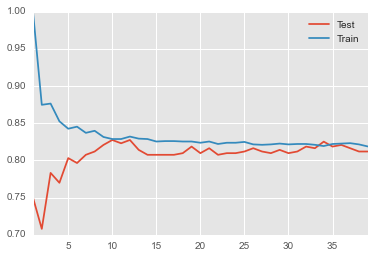

In [136]:
scoresTrain = []
scoresTest=[]
for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train.ravel())
    y_train_pred = model.predict(X_train)
    scoresTrain.append(accuracy_score(y_train, y_train_pred))
    y_test_pred = model.predict(X_test)
    scoresTest.append(accuracy_score(y_test, y_test_pred))
    
plotdata = pd.DataFrame(data={'Train': scoresTrain, 'Test': scoresTest})
plotdata.index=range(1, plotdata.shape[0] + 1)
plotdata

%matplotlib inline
plt.style.use('ggplot')
plotdata.plot()

# Evaluation Metrics

In [113]:


# X_train,X_test,y_train,y_test = train_test_split(X ,y,test_size=0.3, random_state=42)

# models = [LogisticRegression, RandomForestClassifier, KNeighborsClassifier,
#           SVC, DecisionTreeClassifier, GaussianNB, GradientBoostingClassifier]

# results = []
# for model in models:
#     fit = model().fit(X_train, y_train)
#     y_pred = fit.predict(X_test)
#     precision = round(precision_score(y_test, y_pred),3)
#     recall = round(recall_score(y_test, y_pred), 3)
#     f1 = round(f1_score(y_test, y_pred),3)
# #     chi = chi2(X, y)
# #     coef1 = round(float(chi[0][0]),3)
# #     coef2= round(float(chi[0][1]),1)
# #     p1 = round(float(chi[1][0]),3)
# #     p2 = round(float(chi[1][1]),3)
#     accuracy = round(accuracy_score(y_test, y_pred), 3)
    
#     result = {
#         'Model': model.__name__,
#         'Precision': precision,
#         'Recall': recall,
#         'F1': f1,
# #         'Coef': coef1,
# #         'Coef2': coef2,
# #         'P-value': p1,
# #         'P-value2': p2, 
#         'Accuracy': accuracy
#     }
#     results.append(result)
   
    
# cpo_tot = pd.DataFrame(results)
# cpo_tot

# ###

# X_train,X_test,y_train,y_test = train_test_split(X ,y,test_size=0.3, random_state=42)
# classifier = GradientBoostingClassifier()
# target_names = ['Winner', 'Loser']
# classifier.fit(X_train, y_train)
# print model.__name__
# print classification_report(y_test, fit.predict(X_test), target_names=target_names)

###
models = {'log': LogisticRegression(),
          'rf': RandomForestClassifier(),
          'knn': KNeighborsClassifier(n_neighbors=kbest),
          'linsvc': LinearSVC(),
          'tree': DecisionTreeClassifier(),
          'gnb': GaussianNB(),
          'mnb': MultinomialNB(),
          'gbc' : GradientBoostingClassifier()
         }





# pred_probs = {}
# scores = {}
# preds = {}
# for mname, m in models.iteritems():
X = StandardScaler().fit_transform(X)
# X_train,X_test,y_train,y_test = train_test_split(X ,y,test_size=0.3, random_state=42)

#     print "*** %s" % mname
#     m.fit(X_train, y_train)
#     if mname != 'linsvc':
#         pred_probs[mname] = {'train': m.predict_proba(X_train),  'test': m.predict_proba(X_test)}
#     pred = m.predict(X_test)
#     preds[mname] = pred
#     prec, recall, fscore, sup = precision_recall_fscore_support(y_test, pred)
#     scores[mname] = {'accuracy': accuracy_score(y_test, pred),
#                      'precision': prec,
#                      'recall': recall,
#                      'fscore': fscore}
# pprint(scores)

# for mname, y_pred in preds.iteritems():
#     cm = confusion_matrix(y_test, y_pred)
#     cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 3)
#     ax = sns.heatmap(cm, annot=True, xticklabels=names, yticklabels=names)
#     plt.yticks(rotation=0) 
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')
#     plt.title("%s confusion matrix, %s" %(mname, topic))
#     sns.plt.show()

### coefs

def get_scores_coef(X, y):
    # X_train,X_test,y_train,y_test = train_test_split(X ,y,test_size=0.3, random_state=42)
    for mname, m in model_dict.iteritems():

        coefs = sorted(zip(m.coef_[0], X_train.columns))
        for coef in coefs:
            print '%.05f \t%s' % (coef)
        all_preds[mname] = preds
        all_proba[mname] = proba
        return coefs

,Accuracy,F1,Model,Precision,Recall
0,0.588,0.735,LogisticRegression,0.591,0.972
1,0.922,0.933,RandomForestClassifier,0.937,0.930
2,0.535,0.591,KNeighborsClassifier,0.611,0.573
3,0.563,0.719,SVC,0.578,0.950
4,0.910,0.923,DecisionTreeClassifier,0.922,0.925
5,0.753,0.749,GaussianNB,0.933,0.626
6,0.923,0.935,GradientBoostingClassifier,0.926,0.945


# 1 MVP Approach: Just predict the winners, regardless of race
1. Try all classifiers, optimizing when necessary 
2. Evaluate using all metrics 
    -roc curve, all thresholds 
    -percision, accuracy, etc. 
    -knn
        -number of ks
    -log
        -logloss
## Decisions:


In [69]:
# n_samples = X_train.shape[0]
log = LogisticRegression()
# cv = cross_validation.ShuffleSplit(n_samples, n_iter=10, test_size=0.25, random_state=1)
# log.fit(X_t)
# scores = cross_validation.cross_val_score(log, X_train, y_train.ravel(), cv=cv)
y = df['winner']
X = df[['total' , 'incumbent', 'party', 'congyear']]

y_pred_proba = cross_validation.cross_val_predict(log, X, y, cv=10)
# fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, y_pred_proba[:,1])
# roc_rates = [fpr, tpr]
# auc = sklearn.metrics.auc(fpr, tpr)
# plt.title("Logistic Regression", fontsize = 20)
# plt.xlabel("False positive rate")
# plt.ylabel("True positive rate")
# labelname = "Logistic Regression" + ", (area = %0.3f)" % auc
# plt.plot(roc_rates[0], roc_rates[1], linewidth = 2, label = labelname)
# plt.legend(loc = 4)

0.65417738169095463

In [ ]:
def get_score(model = model(), X=X, y=y, cv=5):
    mod = model
    scores = cross_validation.cross_val_score(
        mod, X, y, cv=cv)
    return scores 



# 2 Pick winner based on opponent, whomever has the greater probability

# 3 Train as pairs, take into account opponent characterists 
### Append opponent data to candidate variables ?

# Exploratory Graphs
scatter marked winner/loser
-small/large
-crosstables 

In [67]:
xtab = pd.crosstab(np.array(df['cpo']), np.array(df['winner']), rownames=['cpo'], colnames=['outcome'])[:-1]

# Graphical Evaluation

### Confusion Matrices

In [ ]:
n_samples = X_train.shape[0]
log = LogisticRegression()
cv = cross_validation.ShuffleSplit(n_samples, n_iter=10, test_size=0.3, random_state=1)
scores = cross_validation.cross_val_score(log, X_train, y_train.ravel(), cv=cv)
# print scores.mean()
log.fit(X_train, y_train.ravel())
print "Accuracy Score: %f" % log.score(X_test, y_test.ravel())

log.fit(X_train, y_train.ravel())
y_pred = log.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
labelname = log.classes_
sns.heatmap(cm, annot=True,  fmt='', xticklabels=labelname, yticklabels=labelname)

###
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
# X = df[['incumbent', 'open', 'challenger', 'percunitem', 'congyear', 'total_sc', 'party', 'primaryperc',
#         'close2', 'close5', 'close10', 'leader', 'chairman', 'majorityprev', 'vap', 'adm', 'agr', 'app', 'arm', 'ban', 'bud', 
#              'bus', 'ecn', 'edu', 'egw', 
#              'ene', 'for', 'gov', 'hsc', 'int', 'jud',
#              'lib', 'nat', 'pri', 'rul', 'sci', 'sta',
# #              'tax', 'tra', 'vet', 'way', 'ieagainst', 'ieproxy', 'percpacs', 'ie', 'percind']]
# X = df[['ieagainst']]
# y = df['winner']

labels = ['Winner', "Loser"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

classifier = GradientBoostingClassifier()
y_pred = classifier.fit(X, y).predict(X)

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(y))
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Compute confusion matrix
cm = confusion_matrix(y, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
fig = plt.figure()
fig.patch.set_alpha(0.5)
ax = fig.add_subplot(111)
ax.patch.set_alpha(0.5)
cax = ax.matshow(cm)
plot_confusion_matrix(cm)


# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()
plt.savefig('temp.png', transparent=True)

###
def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels]) # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print "    " + empty_cell,
    for label in labels: 
        print "%{0}s".format(columnwidth) % label,
    print
    # Print rows
    for i, label1 in enumerate(labels):
        print "    %{0}s".format(columnwidth) % label1,
        for j in range(len(labels)): 
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print cell,
        print


labels = ["1", "2", "3", "4"]
cm = confusion_matrix(y_pred, y, labels)


print_cm(cm, labels)

###
for mname, y_pred in preds.iteritems():
    cm = confusion_matrix(y_test, y_pred)
    cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 3)
    ax = sns.heatmap(cm, annot=True, xticklabels=names, yticklabels=names)
    plt.yticks(rotation=0) 
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title("%s confusion matrix, %s" %(mname, topic))
    sns.plt.show()


### Whatever this is

In [ ]:
X = pd.get_dummies(df['cpo']).join(df[['party', 'congyear', 'unitemtotal', 'total', 'total_sc']])
y = df['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)
log = LogisticRegression().fit(X_train, y_train)
y_pred_proba = log.predict_proba(X_test)
fpr, tpr, _ = roc_curve(ç)
roc_rates = [fpr, tpr]
auc = auc(fpr, tpr)
plt.title("Logistic Regression", fontsize = 20)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
labelname = "Logistic Regression" + ", (area = %0.3f)" % auc
plt.plot(roc_rates[0], roc_rates[1], linewidth = 2, label = labelname)
plt.legend(loc = 4)
log_loss(y_test, y_pred_proba[:,1])

### ROC

In [ ]:
#WRONG
sns.set_style("white")
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111) 
m = GradientBoostingClassifier()
m.fit(X_train, y_train)
y_pred = m.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


ax.set_ylabel('True Positive Rate', fontsize = 15)
ax.set_xlabel('False Positive Rate', fontsize=15)
plt.plot(fpr, tpr, color = '#9ecae1')
plt.plot([0, 1], [0, 1], color = '#08306b', linestyle = '--')
plt.show()
plt.savefig('demo.png', transparent=True)

###
estimators = [
    LogisticRegression(), 
    SVC(probability=True), 
    GaussianNB(), 
    DecisionTreeClassifier(max_depth = 5), 
    RandomForestClassifier(), 
    KNeighborsClassifier(n_neighbors = 10)
    ]

names = ["Logistic Regression", "Support Vector Machine", "Gaussian Naive Bayes", "Decision Tree Classifier",
        "Random Forest Classifier", "K Neighbors - 10"]

colors = ["b", "g", "r", "k", "c", "y"]

def roc_rates(estimator, X_train = X_train, y_train = y_train.ravel(), X_test = X_test, y_test = y_test.ravel()):
    
    #Recursive Features Selection
    model = estimator
    model.fit(X_train, y_train)
    test_pred = model.predict_proba(X_test)
    
    # return the roc parameters
    fpr, tpr, _ = metrics.roc_curve(y_test, test_pred[:,1])
    roc_rates = [fpr, tpr]
    auc = metrics.auc(fpr, tpr)
    return roc_rates, auc

#plt.figure(figsize = (15,12))

for i, model in enumerate(estimators):
    #plt.subplot(2,3, i)
    #plt.title(names[i], fontsize = 20)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    
    # plot parameters using unscaled predictors
    params = roc_rates(estimators[i], X_train, y_train.ravel(), X_test, y_test.ravel())[0]
    area = roc_rates(estimators[i], X_train, y_train.ravel(), X_test, y_test.ravel())[1]
    labelname = names[i] + ", (area = %0.2f)" % area
    plt.plot(params[0], params[1], colors[i] + "--", linewidth = 2, label = labelname)
    plt.legend(loc = 4)

plt.tight_layout()
plt.show()

# Calculate log_loss
for i, estimator in enumerate(estimators):
    model = estimator
    model.fit(X_train, y_train.ravel())
    y_pred = model.predict_proba(X_test)
    ll = metrics.log_loss(y_test.ravel(), y_pred[:,1])
    print names[i] + ', LogLoss: %0.2f'% ll